# reading csv file 

In [18]:
### Don't mind about this 
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
###


%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


table = pd.read_csv('Loan_Default.csv')

original_table= table
table.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


# Encoding function

In [19]:


def label_encoding(label):
    uniques = table[label].unique()

    print(uniques)
    #the encoding is the index
    for i in range(len(uniques)):
        table.loc[table[label] == uniques[i],label]=i



- since the property_value and loan_amount features are highly correlated, and we cannot differentiate between the positive and negitave statues points, we decided to drop one of them namely property_value

- since there is a total correlation between the the states label and the Interest_rate_spread, where all values of Interest_rate_spread correlates with status zero ,then we decided to drop it as it shows no information.

# dropping insignificant features 


In [20]:
#drop year since all are 2019
table.drop('year', inplace=True, axis=1)
#table

In [21]:
table.drop('Interest_rate_spread', inplace=True, axis=1)
table.drop('property_value', inplace=True, axis=1)
table.drop('dtir1', inplace=True, axis=1)
table.drop('ID', inplace=True, axis=1)
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  Neg_ammortization          148549 non-null  object 
 13  interest_only              14

# Handling Columns with significant null values

In [22]:


missing_values=table.isnull().sum().sort_values(ascending=False).head(20)
missing_percentge= (missing_values/len(table))*100
print(missing_percentge)

print('\nThe dataframe size now ',table.shape)
table.isnull().sum()

# table['Upfront_charges'] = table['Upfront_charges'].replace(np.nan, table['Upfront_charges'].mean())

# table['rate_of_interest'] = table['rate_of_interest'].replace(np.nan, table['rate_of_interest'].mean())

# table['LTV'] = table['LTV'].replace(np.nan, table['LTV'].mean())

table.drop('Upfront_charges', inplace=True, axis=1)
table.drop('rate_of_interest', inplace=True, axis=1)
table.drop('LTV', inplace=True, axis=1)

#income has a reletively high NULL values but we cant drop it
income_mean = table['income'].mean()
table['income'] = table['income'].replace(np.nan, income_mean)




Upfront_charges              26.664425
rate_of_interest             24.509989
LTV                          10.155378
income                        6.154571
loan_limit                    2.249277
approv_in_adv                 0.610749
submission_of_application     0.134526
age                           0.134526
loan_purpose                  0.090133
Neg_ammortization             0.081388
term                          0.027578
Region                        0.000000
total_units                   0.000000
Security_Type                 0.000000
co-applicant_credit_type      0.000000
Credit_Score                  0.000000
credit_type                   0.000000
lump_sum_payment              0.000000
Secured_by                    0.000000
occupancy_type                0.000000
dtype: float64

The dataframe size now  (148670, 29)


In [23]:

missing_values=table.isnull().sum().sort_values(ascending=False).head(20)
missing_percentge= (missing_values/len(table))*100
print(missing_percentge)

print('\nThe dataframe size now ',table.shape)
table.isnull().sum()

counts = table['Status'].value_counts().to_dict()
print(counts)

loan_limit                   2.249277
approv_in_adv                0.610749
submission_of_application    0.134526
age                          0.134526
loan_purpose                 0.090133
Neg_ammortization            0.081388
term                         0.027578
Secured_by                   0.000000
Security_Type                0.000000
Region                       0.000000
co-applicant_credit_type     0.000000
Credit_Score                 0.000000
credit_type                  0.000000
income                       0.000000
total_units                  0.000000
construction_type            0.000000
occupancy_type               0.000000
Gender                       0.000000
lump_sum_payment             0.000000
interest_only                0.000000
dtype: float64

The dataframe size now  (148670, 26)
{0: 112031, 1: 36639}


# label encoding 

In [24]:
for i in range(len(table.iloc[3])):
   if(type(table.iloc[3][i])==str):
       label_encoding(table.columns[i])

#table

['cf' nan 'ncf']
['Sex Not Available' 'Male' 'Joint' 'Female']
['nopre' 'pre' nan]
['type1' 'type2' 'type3']
['p1' 'p4' 'p3' 'p2' nan]
['l1' 'l2']
['nopc' 'opc']
['nob/c' 'b/c']
['not_neg' 'neg_amm' nan]
['not_int' 'int_only']
['not_lpsm' 'lpsm']
['sb' 'mh']
['pr' 'sr' 'ir']
['home' 'land']
['1U' '2U' '3U' '4U']
['EXP' 'EQUI' 'CRIF' 'CIB']
['CIB' 'EXP']
['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
['to_inst' 'not_inst' nan]
['south' 'North' 'central' 'North-East']
['direct' 'Indriect']


In [13]:
#fig = plt.figure(figsize= (50,20))
#sns.countplot(data=table)

# Normalization 

In [25]:

table_before_normalization = table.copy()
scaled_colmns={'loan_amount','term','income','Credit_Score'}
for column in scaled_colmns:
    print(column,table[column].min(), table[column].max() )   
    table[column] = (table[column] - table[column].min()) / (table[column].max() - table[column].min()) 


table.info()

income 0.0 578580.0
term 96.0 360.0
loan_amount 16500 3576500
Credit_Score 500 900
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  float64
 9   term                       148629 non-null  float64
 10  Neg_ammortization          148549 non-null  object 
 11  interest_only              148670 non-null  object 
 12  lum

Before Normalization


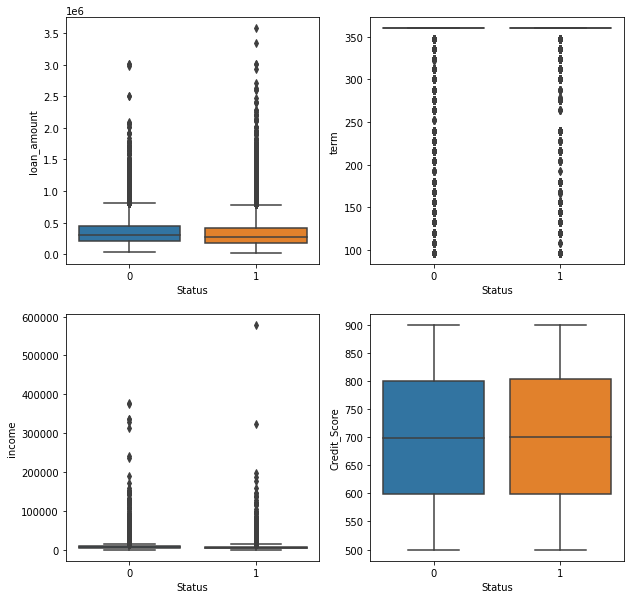

In [15]:
from matplotlib import pyplot
#sns.boxplot(x='Status',y='loan_amount',data=table)

#sns.distplot(table['Gender'])

#plt.scatter(table['rate_of_interest'],table['loan_amount'])

# sns.FacetGrid(table,hue='Status',size=5).map(sns.distplot,'LTV').add_legend() #histogram and PDF

fig, axes = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

ax = sns.boxplot(x="Status", y="loan_amount", data=table_before_normalization, orient='v',ax=axes[0, 0])
# ax = sns.boxplot(x="Status", y="rate_of_interest", data=table_before_normalization, orient='v',ax=axes[0, 1])
# ax = sns.boxplot(x="Status", y="Upfront_charges", data=table_before_normalization, orient='v',ax=axes[1, 0])
ax = sns.boxplot(x="Status", y="term", data=table_before_normalization, orient='v',ax=axes[0, 1])
ax = sns.boxplot(x="Status", y="income", data=table_before_normalization, orient='v', ax=axes[1, 0])
ax = sns.boxplot(x="Status", y="Credit_Score", data=table_before_normalization, orient='v',ax=axes[1, 1])





After Normalization


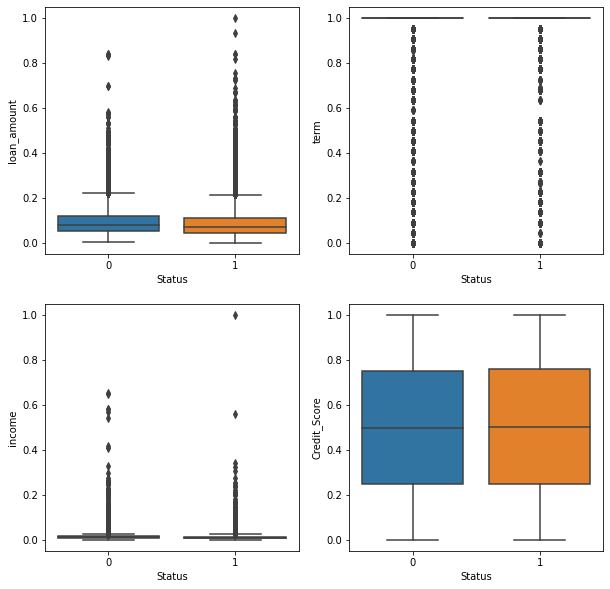

In [16]:

fig, axes = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

ax = sns.boxplot(x="Status", y="loan_amount", data=table, orient='v',ax=axes[0, 0])
# ax = sns.boxplot(x="Status", y="rate_of_interest", data=table, orient='v',ax=axes[0, 1])
# ax = sns.boxplot(x="Status", y="Upfront_charges", data=table, orient='v',ax=axes[1, 0])
ax = sns.boxplot(x="Status", y="term", data=table, orient='v',ax=axes[0, 1])
ax = sns.boxplot(x="Status", y="income", data=table, orient='v', ax=axes[1, 0])
ax = sns.boxplot(x="Status", y="Credit_Score", data=table, orient='v',ax=axes[1, 1])

Both graphs are identical with the exception of the scales

# analysing the null value distribution in the dataset

In [17]:
#sns.countplot(x="Region", hue="Status",  data=table )
missing_values=table.isnull().sum().sort_values(ascending=False).head(20)
missing_percentge= (missing_values/len(table))*100
print (missing_percentge)

print('\nThe dataframe size now ',table.shape)

loan_limit                   2.249277
approv_in_adv                0.610749
submission_of_application    0.134526
age                          0.134526
loan_purpose                 0.090133
Neg_ammortization            0.081388
term                         0.027578
Secured_by                   0.000000
Security_Type                0.000000
Region                       0.000000
co-applicant_credit_type     0.000000
Credit_Score                 0.000000
credit_type                  0.000000
income                       0.000000
total_units                  0.000000
construction_type            0.000000
occupancy_type               0.000000
Gender                       0.000000
lump_sum_payment             0.000000
interest_only                0.000000
dtype: float64

The dataframe size now  (148670, 26)


In [18]:
# table["Upfront_charges"].plot.hist(bins=np.arange(0,100, 5), alpha=0.5)
counts = table['Status'].value_counts().to_dict()
print(counts)

{0: 112031, 1: 36639}


# Creating a dataframe with no NULL values.
We need to create a datafram that has no Null values as some models cannot deal with NULL values.



- Finding the coloumns with NULL values


In [19]:
table_no_nulls = table.copy()
missing_values=table_no_nulls.isnull().sum().sort_values(ascending=False).head(20)
missing_percentge= (missing_values/len(table_no_nulls))*100
print('total number of NULL values is: ',table_no_nulls.isnull().sum().sum(),'\n\n')
missing_percentge

total number of NULL values is:  4948 




loan_limit                   2.249277
approv_in_adv                0.610749
submission_of_application    0.134526
age                          0.134526
loan_purpose                 0.090133
Neg_ammortization            0.081388
term                         0.027578
Secured_by                   0.000000
Security_Type                0.000000
Region                       0.000000
co-applicant_credit_type     0.000000
Credit_Score                 0.000000
credit_type                  0.000000
income                       0.000000
total_units                  0.000000
construction_type            0.000000
occupancy_type               0.000000
Gender                       0.000000
lump_sum_payment             0.000000
interest_only                0.000000
dtype: float64

We will decide now how to handle the NULLs in each column

- Use average for: income / loan_limit / age (Because they are numeric values)
- Use random values for: approv_in_adv / submission_of_application / loan_purpose / Neg_ammortization / term (Because they are Categorical Values)

In [20]:
# Calulating the mean of both columns 
loan_limit_mean = table_no_nulls['loan_limit'].mean()
age_mean = table_no_nulls['age'].mean()


#replacing the values with the mean
table_no_nulls['age'] = table_no_nulls['age'].replace(np.nan, age_mean)
table_no_nulls['loan_limit'] = table_no_nulls['loan_limit'].replace(np.nan, loan_limit_mean)


In [21]:
#replacing NULL values with random numbers
import random

table_no_nulls['approv_in_adv'] = table_no_nulls['approv_in_adv'].apply(lambda x:x if pd.notnull(x) else random.randint(table_no_nulls['approv_in_adv'].min() , table_no_nulls['approv_in_adv'].max() ) )
table_no_nulls['submission_of_application'] = table_no_nulls['submission_of_application'].apply(lambda x:x if pd.notnull(x) else random.randint(table_no_nulls['submission_of_application'].min() , table_no_nulls['submission_of_application'].max() ) )
table_no_nulls['loan_purpose'] = table_no_nulls['loan_purpose'].apply(lambda x:x if pd.notnull(x) else random.randint(table_no_nulls['loan_purpose'].min() , table_no_nulls['loan_purpose'].max() ) )
table_no_nulls['Neg_ammortization'] = table_no_nulls['Neg_ammortization'].apply(lambda x:x if pd.notnull(x) else random.randint(table_no_nulls['Neg_ammortization'].min() , table_no_nulls['Neg_ammortization'].max() ) )
table_no_nulls['term'] = table_no_nulls['term'].apply(lambda x:x if pd.notnull(x) else random.randint(table_no_nulls['term'].min() , table_no_nulls['term'].max() ) )


Checking if all NULL values have been removed

In [22]:
print('total number of NULL values is: ',table_no_nulls.isnull().sum().sum(),'\n\n')



total number of NULL values is:  0 




In [23]:
# X = table.loc[:,table.columns !="Status"] #all colomns except Status
# y = table['Status'] #Status column
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA
X_NoNull = table_no_nulls.loc[:,table_no_nulls.columns !="Status"] #all colomns except Status
y_NoNull = table_no_nulls['Status'] #Status column

# Failed attempts to handle the class imbalance in our dataset. 

# smote = SMOTE()
# X_NoNull, y_NoNull = smote.fit_resample(X_NoNull, y_NoNull)

# nm = NearMiss()

# X_NoNull, y_NoNull = nm.fit_resample(X_NoNull, y_NoNull)


# pca = PCA()
# X_NoNull = pca.fit_transform(X_NoNull)

# X_NoNull


In [24]:

print(y_NoNull.value_counts())

0    112031
1     36639
Name: Status, dtype: int64


# Splitting Training and Testing Data


In [25]:
from sklearn.model_selection import train_test_split
#df.loc[:, df.columns != 'b']



X_NoNull_train, X_NoNull_test, y_NoNull_train, y_NoNull_test = train_test_split(X_NoNull,y_NoNull,test_size=0.2,random_state=30) #data is randomized during spliiting
#split the data into train, validation, test
#X_NoNull_train_val, X_NoNull_test, y_NoNull_train_val, y_NoNull_test = train_test_split(X_NoNull,y_NoNull,test_size=0.2,random_state=30) #data is randomized during spliiting

#X_NoNull_train, X_NoNull_val, y_NoNull_train, y_NoNull_val = train_test_split(X_NoNull_train_val, y_NoNull_train_val, test_size=0.25, random_state=30) # 0.25 x 0.8 = 0.2


# Plotting histograms

In [26]:
# Commented because it takes a big space and takes a lot of runtime
# for i in table.columns:
    
#     plt.figure()
#     plt.title(f'{i}')
#     plt.hist(table[i], bins = 80)

counts = table['Status'].value_counts().to_dict()
counts

{0: 112031, 1: 36639}

# Implementing NN Model with learning rate bias

In [27]:

import pandas as pd
import numpy as np
class Layer:
    
    ### activations
    def _identity(self,z):
        return z
    
    def _identity_diff(self,z):
        return np.ones_like(z)
    
    def _sigmoid(self,z):
        #z=z.to_numpy()
        z=z.astype(float)
        return (1/(1+np.exp(-1*z)))

    def _diff_sigmoid(self,z):
        return self._sigmoid(z)*(1-self._sigmoid(z))
    
    ###########

    def __init__(self,n_input,n_output, activation="identity",name=None):
        self.n_output= n_output
        self.n_input= n_input
        self.name= name
        
        if activation == "identity":
            self.activation = self._identity
            self.diff_act= self._identity_diff
        
        elif activation == "sigmoid":
            self.activation = self._sigmoid
            self.diff_act= self._diff_sigmoid
        
        
            
        
        
        self.W= np.random.randn(self.n_output,self.n_input)*np.sqrt(2/self.n_input)
        self.b= np.random.randn(self.n_output,1)*np.sqrt(2/self.n_input)

        self.dW= np.zeros_like(self.W)
        self.db= np.zeros_like(self.b)
        
        self.Z= None
        self.Ai = None
        
    
    def forward(self,Ai):
#         print("FWD")
#         print(Ai.shape)
#         print(self.W.shape)
#         print(self.b.shape)
        z =  np.add((self.W @ Ai),self.b)
#         print(z.shape)
        A = self.activation(z)
#         print(A.shape)
        
        
        self.Z = z
        self.Ai = Ai
        return A
    
    
    def backward(self,inp):
        
#         print("input shape: ",end='')
#         print(inp.shape)
       
        act_diff = self.diff_act(self.Z)
#         print("act_diff shape: ",end='')
#         print(act_diff.shape)
        
        tmp = inp * act_diff
#         print("tmp shape: ",end='')
#         print(tmp.shape)
        
        bet = tmp @ self.Ai.T # vector of 1s
#         print("bet shape: ",end='')
#         print(bet.shape)
        
        
        e = np.ones((self.Ai.shape[1],1))
        db = tmp @ e
#         print("db shape: ",end='')
#         print(db.shape)
        
        self.dW = self.dW + bet
        self.db = self.db + db
        
        
        return self.W.T @ tmp
    
    
    def zeroing_delta(self):
        self.dW= np.zeros_like(self.W)
        self.db= np.zeros_like(self.b)
#########################################################################################################
class NN:
    
    ########
    ## losses
    def MSE(self,y,yhat):
        a=np.square(yhat-y)
        a=np.sum(a)
        b= 1/(2*y.shape[1])
        return a*b

    ## diff losses
    def _diff_MSE(self,y,yhat, factor):

        d=(yhat-y)
        return  pd.DataFrame(d.values*factor.values, columns=d.columns, index=d.index)
    
    #########
    
    def __init__(self,lr):
        self.layers = []
        self.alpha= lr
        
    
    
    
    def forward(self,inp):
        a=inp
#         print(a.shape)
        for layer in self.layers:
            a = layer.forward(a)
#             print(a.shape)
        
        return a
    
    def backward(self,input):
        gd = input
        for layer in self.layers[::-1]:
            gd = layer.backward(gd)
            
    def add_layer(self,n_input,n_output, activation="identity",name=None):
        self.layers.append(Layer(n_input,n_output, activation=activation,name=name))
        
    def fit(self, x_train,y_train, epochs=5): #data dim is MxN .. M no of examples.. N no of dimension
        

       M = x_train.shape[0]

       l = y_train.shape[0]
       biased_learning_rate = np.zeros(l)
       cc= y_train.to_numpy()
       for i in range(l):
            if (cc[i] == 0):
                biased_learning_rate[i]+= 1
            else:
                biased_learning_rate[i]+= 4
       biased_learning_rate= pd.DataFrame(biased_learning_rate)
        
       x_train = x_train.T
       y_train = y_train.T
        
#         print(x_train.shape)
#         print(y_train.shape)s
        
       for i in range(epochs):
           print("Epoche {}/{}".format(i+1,epochs))
           y_hat= self.forward(x_train)
           print("in _diff_MSE ")
           dl_dyhat = self._diff_MSE(y_train,y_hat, biased_learning_rate)
           print("out _diff_MSE ")            
           self.backward(dl_dyhat)
            
           # update using GD
           for i in range(len(self.layers)):
               # layers[i].dW=layers[i].dW/N
               # layers[i].db=layers[i].db/N
               self.layers[i].W = self.layers[i].W - self.alpha  * (self.layers[i].dW/M)
               self.layers[i].b = self.layers[i].b - self.alpha  * (self.layers[i].db/M)
                
            
           # zeroing deltas
           for layer in self.layers:
               layer.zeroing_delta()
            
       print("Finished....") 
            
            
        

    
    def predict(self,x_test): #data dim is NxD .. N no of examples.. D no of dimension
#         print(x_test.shape)
        y_hat= self.forward(x_test.T)
        print(y_hat.shape)
        return y_hat.T
                    

# fitting

In [28]:
nn = NN(lr=0.01)

print(X_NoNull_train.shape[1])
nn.add_layer(25,10,activation="sigmoid",name="l1")
nn.add_layer(10,5,activation = "sigmoid",name="l2")
nn.add_layer(5,1,activation = "sigmoid",name="l3")
print(y_NoNull_train)

nn.fit(X_NoNull_train,y_NoNull_train,3)

25
112231    0
112563    1
131590    0
17461     0
64551     0
         ..
96053     1
66455     1
46220     1
98804     0
48045     1
Name: Status, Length: 118936, dtype: int64
Epoche 1/3


# predict

In [ ]:
nn_y_predicted = nn.predict(X_NoNull_test)
from sklearn.metrics import classification_report

nn_y_predicted= nn_y_predicted.astype(int)
print(classification_report(y_NoNull_test, nn_y_predicted))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_NoNull_test, nn_y_predicted)


(1, 29734)
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22319
           1       0.00      0.00      0.00      7415

    accuracy                           0.75     29734
   macro avg       0.38      0.50      0.43     29734
weighted avg       0.56      0.75      0.64     29734



array([[22319,     0],
       [ 7415,     0]])